[[0.]
 [0.]
 [1.]]


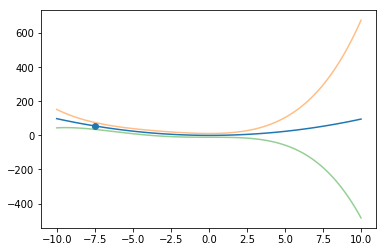

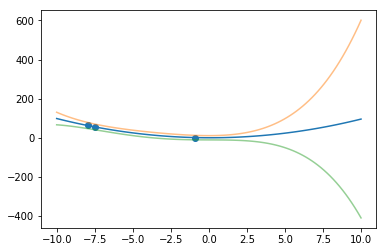

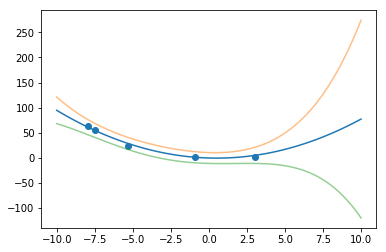

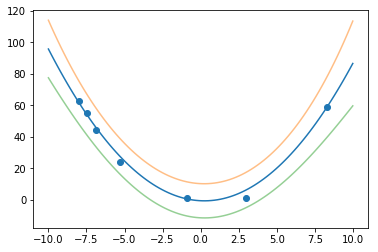

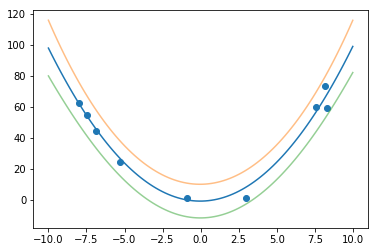

In [12]:
from numpy.linalg import inv
import numpy as np
import matplotlib.pyplot as plt


#############
##   MAP   ##
#############

def x2phi(x, num_basis):
    phi = np.array([[x**d for d in range(num_basis)]]).reshape(num_basis,1)
    return phi

# Ground Truth  y = 1.5 + 0.5x
w_gt = [0.0, 0.0, 1.0]
num_basis = len(w_gt)
w_gt = np.array(w_gt, ndmin=2).reshape(num_basis, 1)
data_var = 10
print(w_gt)

# prior 
a = 1/data_var     # a: guess 1/var of y
b = 1              # b: guess 1/var of weight
mu_prior = np.array( [[0.0 for x in range(num_basis)] ] ).T
lambda_prior = np.identity(num_basis) * b

points_xs = []
points_ys = []
for i in range(10):
    # data 
    x = np.asscalar(np.random.uniform(-10,10,1))
    points_xs.append(x)
    phi = x2phi(x, num_basis)
    y = np.matmul(w_gt.T, phi) + np.asscalar(np.random.normal(0, data_var**(1/2), 1))
    points_ys.append(y)
    
    # posterior
    lambda_posterior = a * np.matmul(phi, phi.T) + lambda_prior
    mu_posterior = np.matmul(inv(lambda_posterior),  a*np.matmul(phi, y) + np.matmul(lambda_prior, mu_prior))

    # update prior
    mu_prior = mu_posterior
    lambda_prior = lambda_posterior
    if i % 2 == 0:
        plot_pred(mu_posterior, phi, a, lambda_posterior)
    
# print("Posterior")
# print(mu_posterior)
# print(inv(lambda_posterior))

In [4]:
##################################
##   Predictive Distribution    ##
##################################
def pred_distribution(mu, phi, a, lambda_):
    mu_pred  = np.matmul(mu.T, phi)
    var_pred = (1/a) + np.matmul(np.matmul(phi.T, inv(lambda_)), phi)
    return np.asscalar(mu_pred), np.asscalar(var_pred)

def plot_pred(mu_posterior, phi, a, lambda_posterior):
    mu_pred, var_pred = pred_distribution(mu_posterior, phi, a, lambda_posterior)
    xs = np.linspace(-10, 10, 100)
    ys_mu = []
    ys_std_up = []
    ys_std_down = []
    for x in xs:
        phi = x2phi(x, num_basis)
        mu_pred, var_pred = pred_distribution(mu_posterior, phi, a, lambda_posterior)
        ys_mu.append(mu_pred)
        ys_std_up.append(mu_pred+var_pred)
        ys_std_down.append(mu_pred-var_pred)
    plt.scatter(points_xs, points_ys)
    plt.plot(xs, ys_mu)
    plt.plot(xs, ys_std_up, alpha=0.5)
    plt.plot(xs, ys_std_down, alpha=0.5)
    plt.show()